# Evaluation of Keras Function Fits

In sallamander's githup tutorial on shallow Neural Nets he demonstrated how increasing the number of nodes impacts the overall fit of the model. This notebook will simply expand that section somewhat, as well as split test data from the training to make the analysis somewhat more valid.

In [2]:
%matplotlib inline
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.layers.core import Dense

from plotting import plot_func
from general import gen_trigonometric, gen_powx

In [3]:
def get_keras_model(hlayer_size): 
    learning_rate = 0.01
    # 1. Specify a placeholder for the inputs (this is effectively Layer 1) 
    xs = Input(shape=(1,))
    # 2. Define the equation that generates predictions.
    layer = Dense(hlayer_size, activation='sigmoid')(xs) # Layer 2 (hidden layer)
    ys = Dense(1, activation='linear')(layer) # Layer 3 (output layer)

    # 3. Define a `Model` object that will be used to train/learn the coefficients. 
    shallow_network = Model(input=xs, output=ys)
    
    # 4. Define the optimizer and loss function used to train/learn the coefficients. 
    sgd = SGD(learning_rate)
    
    # 5. Compile the model (basically, build up the backpropagation steps)
    shallow_network.compile(loss='mean_squared_error', optimizer=sgd)
    
    return shallow_network

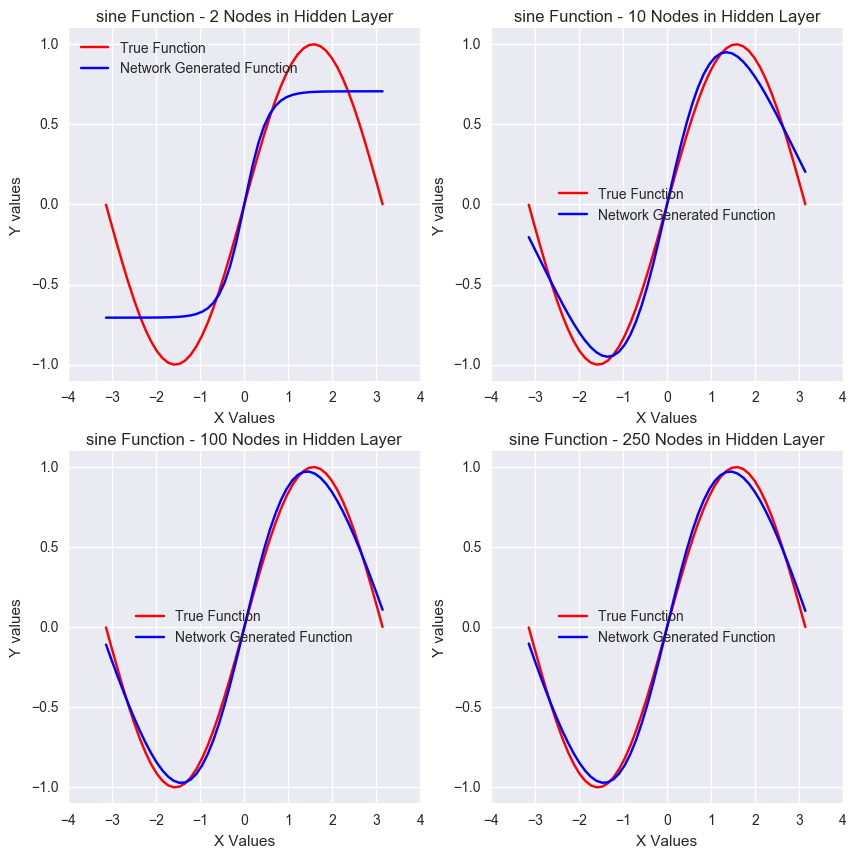

In [4]:
np.random.seed(317) # set seed for reproducibility 
# Randomly generate some fake data that follows a y = sin(x) relationship.
n_obs = 50
xs, ys = gen_trigonometric(n_obs=n_obs, func='sine')

# Fit four different sized networks, plotting the true function and 
# network generated function (e.g. it's predictions) for each network
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
hlayer_sizes = (2, 10, 100, 250)
for ax, hlayer_size in zip(axes.flatten(), hlayer_sizes):
    # Get the `keras` network. 
    shallow_network = get_keras_model(hlayer_size)
    
    # Learn the coefficients (perform iterations of forward and backward propagation)
    shallow_network.fit(xs, ys, nb_epoch=50000, verbose=0, batch_size=n_obs)
        
    # Obtain final predictions after training.
    yhats = shallow_network.predict(xs)
    
    # Plot the true function as well as the function predicted by the model. 
    plot_func(xs=xs, y_true=ys, y_pred=yhats, n_nodes=hlayer_size, func='sine', ax=ax)

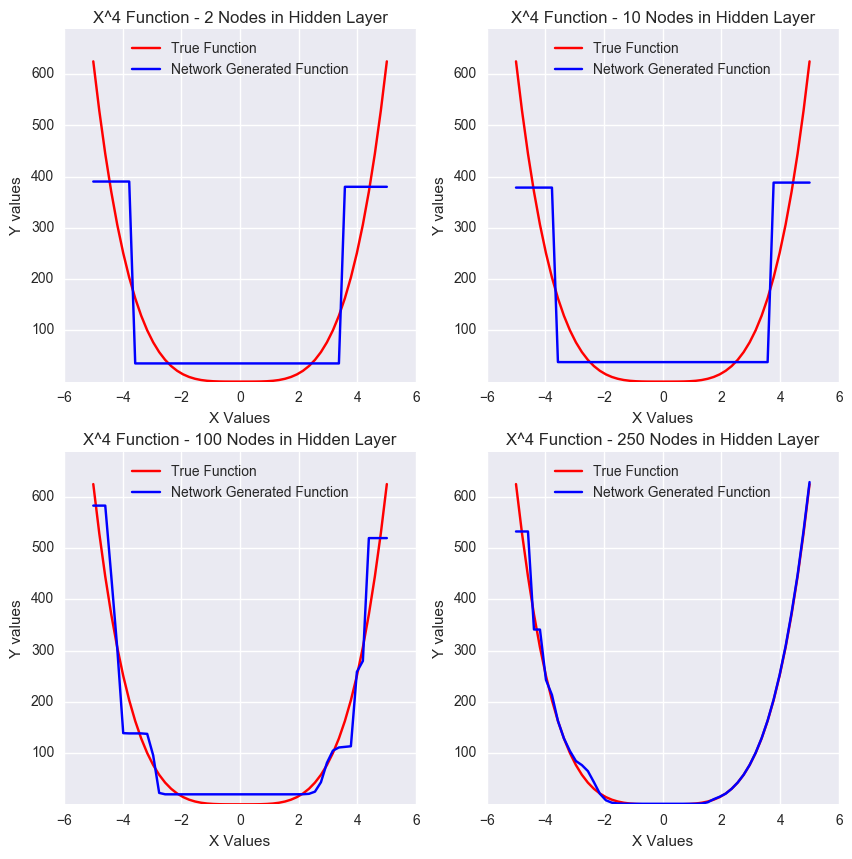

In [5]:
np.random.seed(317) # set seed for reproducibility 
# Randomly generate some fake data that follows a y = sin(x) relationship.
n_obs = 50
xs, ys = gen_powx(n_obs=n_obs, pow_x=4)

# Fit four different sized networks, plotting the true function and 
# network generated function (e.g. it's predictions) for each network
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
hlayer_sizes = (2, 10, 100, 250)
for ax, hlayer_size in zip(axes.flatten(), hlayer_sizes):
    # Get the `keras` network. 
    shallow_network = get_keras_model(hlayer_size)
    
    # Learn the coefficients (perform iterations of forward and backward propagation)
    shallow_network.fit(xs, ys, nb_epoch=50000, verbose=0, batch_size=n_obs)
        
    # Obtain final predictions after training.
    yhats = shallow_network.predict(xs)
    
    # Plot the true function as well as the function predicted by the model. 
    plot_func(xs=xs, y_true=ys, y_pred=yhats, n_nodes=hlayer_size, func='X^4', ax=ax)

In the examples provided the NNs are both fit and predicted over the same data sets. The following examples split out train and test sets to better assess performance.

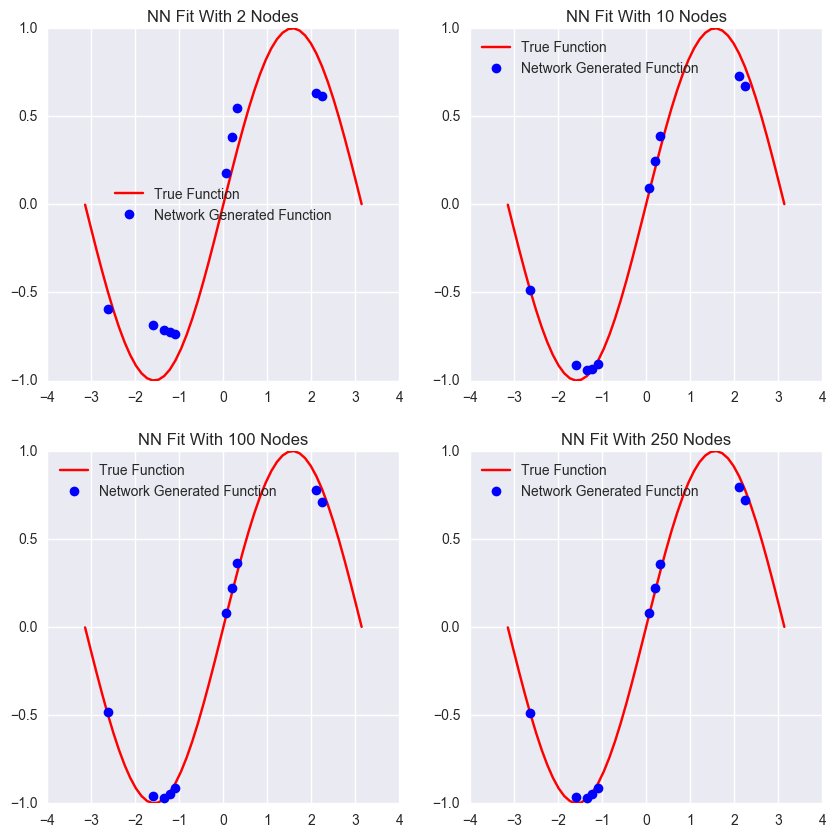

In [13]:
np.random.seed(317) # set seed for reproducibility 
# Randomly generate some fake data that follows a y = sin(x) relationship.
n_obs = 50
xs, ys = gen_trigonometric(n_obs=n_obs, func='sine')

df = pd.DataFrame.from_dict({'xs': xs.ravel(), 'ys': ys.ravel()})
df_train = df.sample(frac=0.8, random_state=200)
df_test = df.drop(df_train.index)

# Fit four different sized networks, plotting the true function and 
# network generated function (e.g. it's predictions) for each network
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
hlayer_sizes = (2, 10, 100, 250)
for ax, hlayer_size in zip(axes.flatten(), hlayer_sizes):
    # Get the `keras` network. 
    shallow_network = get_keras_model(hlayer_size)
    
    # Learn the coefficients (perform iterations of forward and backward propagation)
    shallow_network.fit(df_train['xs'].values, df_train['ys'].values, nb_epoch=50000, verbose=0, batch_size=n_obs)
        
    # Obtain final predictions after training.
    yhats = shallow_network.predict(df_test['xs'])
    
    # Plot the true function as well as the function predicted by the model. 
    ax.plot(df['xs'].values, df['ys'].values, 'r-', label='True Function')
    ax.plot(df_test['xs'], yhats, 'b-', label='Network Generated Function', marker='o', linestyle='None')
    ax.set_title('NN Fit With {} Nodes'.format(hlayer_size))
    ax.legend(loc='best')

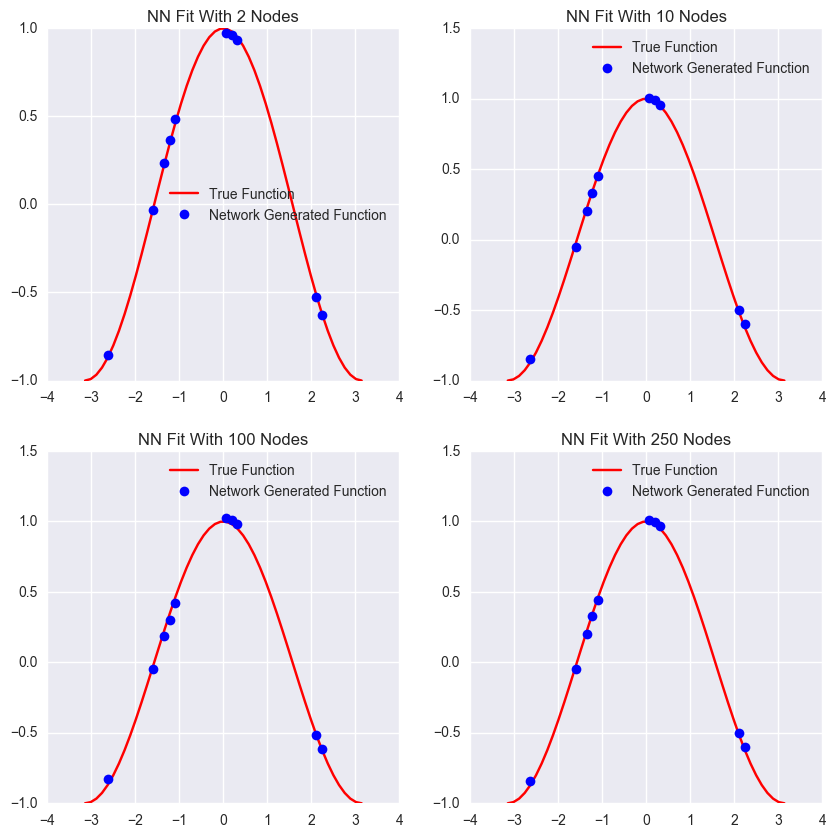

In [14]:
np.random.seed(317) # set seed for reproducibility 
# Randomly generate some fake data that follows a y = sin(x) relationship.
n_obs = 50
xs, ys = gen_trigonometric(n_obs=n_obs, func='cosine')

df = pd.DataFrame.from_dict({'xs': xs.ravel(), 'ys': ys.ravel()})
df_train = df.sample(frac=0.8, random_state=200)
df_test = df.drop(df_train.index)

# Fit four different sized networks, plotting the true function and 
# network generated function (e.g. it's predictions) for each network
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
hlayer_sizes = (2, 10, 100, 250)
for ax, hlayer_size in zip(axes.flatten(), hlayer_sizes):
    # Get the `keras` network. 
    shallow_network = get_keras_model(hlayer_size)
    
    # Learn the coefficients (perform iterations of forward and backward propagation)
    shallow_network.fit(df_train['xs'].values, df_train['ys'].values, nb_epoch=50000, verbose=0, batch_size=n_obs)
        
    # Obtain final predictions after training.
    yhats = shallow_network.predict(df_test['xs'])
    
    # Plot the true function as well as the function predicted by the model. 
    ax.plot(df['xs'].values, df['ys'].values, 'r-', label='True Function')
    ax.plot(df_test['xs'], yhats, 'b-', label='Network Generated Function', marker='o', linestyle='None')
    ax.set_title('NN Fit With {} Nodes'.format(hlayer_size))
    ax.legend(loc='best')

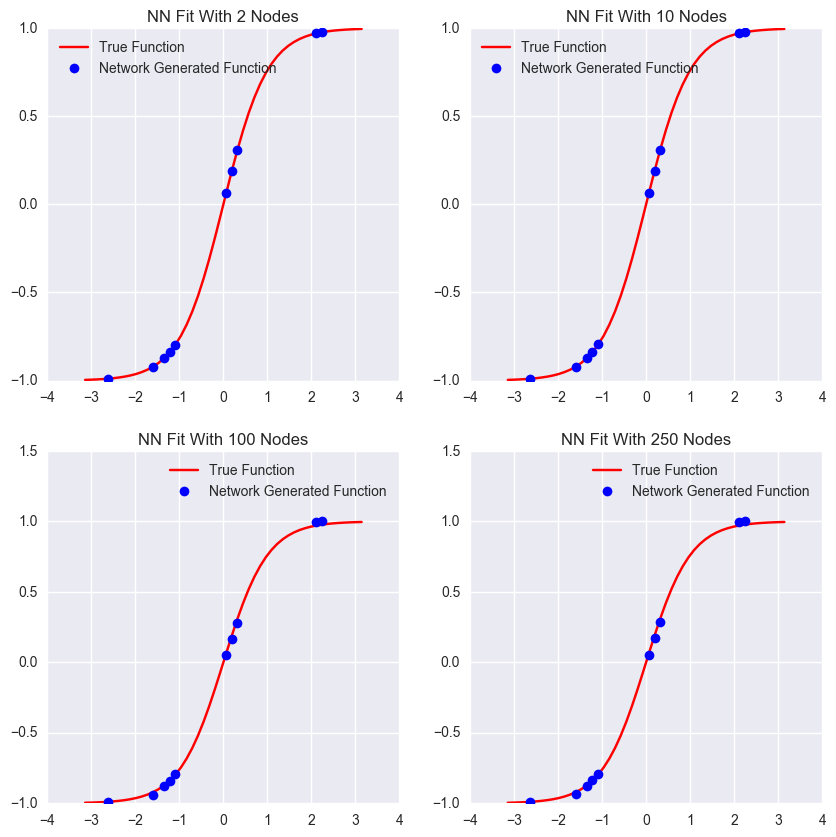

In [15]:
np.random.seed(317) # set seed for reproducibility 
# Randomly generate some fake data that follows a y = sin(x) relationship.
n_obs = 50
xs, ys = gen_trigonometric(n_obs=n_obs, func='tanh')

df = pd.DataFrame.from_dict({'xs': xs.ravel(), 'ys': ys.ravel()})
df_train = df.sample(frac=0.8, random_state=200)
df_test = df.drop(df_train.index)

# Fit four different sized networks, plotting the true function and 
# network generated function (e.g. it's predictions) for each network
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
hlayer_sizes = (2, 10, 100, 250)
for ax, hlayer_size in zip(axes.flatten(), hlayer_sizes):
    # Get the `keras` network. 
    shallow_network = get_keras_model(hlayer_size)
    
    # Learn the coefficients (perform iterations of forward and backward propagation)
    shallow_network.fit(df_train['xs'].values, df_train['ys'].values, nb_epoch=50000, verbose=0, batch_size=n_obs)
        
    # Obtain final predictions after training.
    yhats = shallow_network.predict(df_test['xs'])
    
    # Plot the true function as well as the function predicted by the model. 
    ax.plot(df['xs'].values, df['ys'].values, 'r-', label='True Function')
    ax.plot(df_test['xs'], yhats, 'b-', label='Network Generated Function', marker='o', linestyle='None')
    ax.set_title('NN Fit With {} Nodes'.format(hlayer_size))
    ax.legend(loc='best')

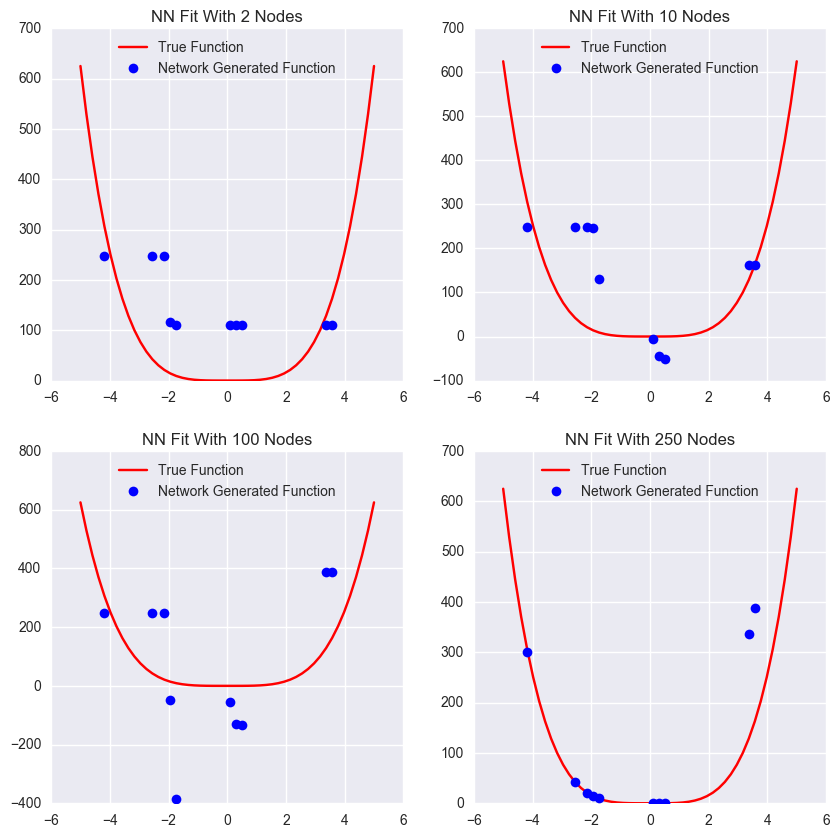

In [16]:
np.random.seed(317) # set seed for reproducibility 
n_obs = 50
xs, ys = gen_powx(n_obs=n_obs, pow_x=4)

df = pd.DataFrame.from_dict({'xs': xs.ravel(), 'ys': ys.ravel()})
df_train = df.sample(frac=0.8, random_state=200)
df_test = df.drop(df_train.index)

# Fit four different sized networks, plotting the true function and 
# network generated function (e.g. it's predictions) for each network
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
hlayer_sizes = (2, 10, 100, 250)
for ax, hlayer_size in zip(axes.flatten(), hlayer_sizes):
    # Get the `keras` network. 
    shallow_network = get_keras_model(hlayer_size)
    
    # Learn the coefficients (perform iterations of forward and backward propagation)
    shallow_network.fit(df_train['xs'].values, df_train['ys'].values, nb_epoch=50000, verbose=0, batch_size=n_obs)
        
    # Obtain final predictions after training.
    yhats = shallow_network.predict(df_test['xs'])
    
    # Plot the true function as well as the function predicted by the model. 
    ax.plot(df['xs'].values, df['ys'].values, 'r-', label='True Function')
    ax.plot(df_test['xs'], yhats, 'b-', label='Network Generated Function', marker='o', linestyle='None')
    ax.set_title('NN Fit With {} Nodes'.format(hlayer_size))
    ax.legend(loc='best')

Most of the wave function models perform quite well, but it's clear this simple NN has some difficulty with the quadratic function. Altering the data count or optimization routine to follow.

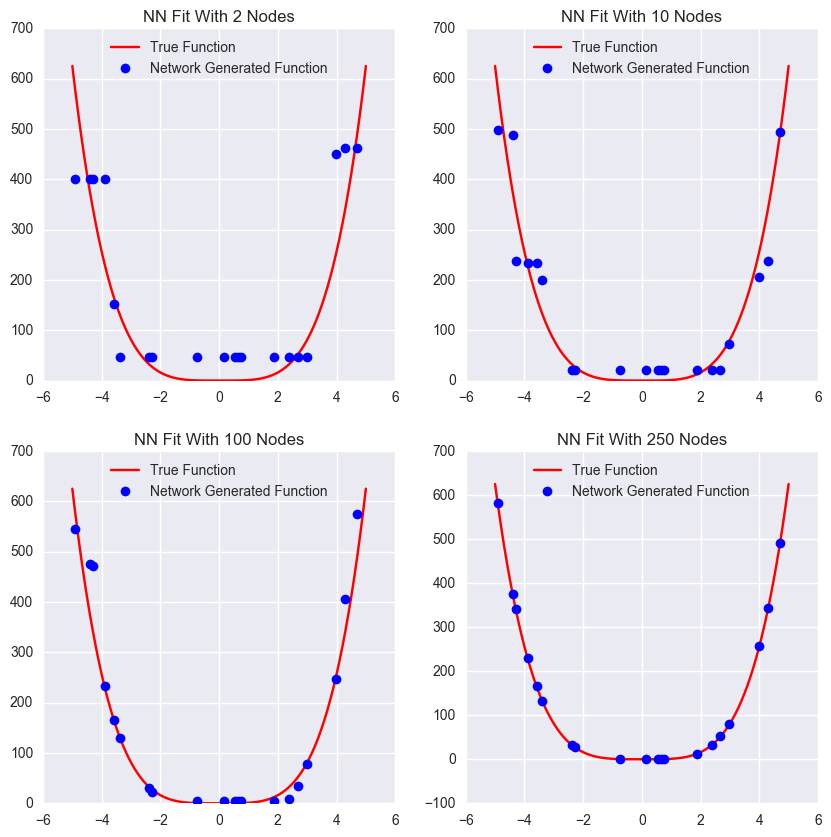

In [17]:
np.random.seed(317) # set seed for reproducibility 
n_obs = 100
xs, ys = gen_powx(n_obs=n_obs, pow_x=4)

df = pd.DataFrame.from_dict({'xs': xs.ravel(), 'ys': ys.ravel()})
df_train = df.sample(frac=0.8, random_state=200)
df_test = df.drop(df_train.index)

# Fit four different sized networks, plotting the true function and 
# network generated function (e.g. it's predictions) for each network
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
hlayer_sizes = (2, 10, 100, 250)
for ax, hlayer_size in zip(axes.flatten(), hlayer_sizes):
    # Get the `keras` network. 
    shallow_network = get_keras_model(hlayer_size)
    
    # Learn the coefficients (perform iterations of forward and backward propagation)
    shallow_network.fit(df_train['xs'].values, df_train['ys'].values, nb_epoch=50000, verbose=0, batch_size=n_obs)
        
    # Obtain final predictions after training.
    yhats = shallow_network.predict(df_test['xs'])
    
    # Plot the true function as well as the function predicted by the model. 
    ax.plot(df['xs'].values, df['ys'].values, 'r-', label='True Function')
    ax.plot(df_test['xs'], yhats, 'b-', label='Network Generated Function', marker='o', linestyle='None')
    ax.set_title('NN Fit With {} Nodes'.format(hlayer_size))
    ax.legend(loc='best')

Wanted to get further but basically more data = good (who would have thought) and the examples provided displayed inflated skil.